<a href="https://colab.research.google.com/github/ingrid-revitti/DS/blob/main/cp1_sem2_v2_Metrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução checkpoint 1 - Statistics


## Módulos

In [ ]:
# gerais
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
! sudo pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
# texto
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from unicodedata import normalize
import unidecode
import string
from spacy.lang.pt.stop_words import STOP_WORDS

## Dados

In [ ]:
dados_atendimentos = pd.read_csv('dados_atendimentos.csv')

In [ ]:
dados_atendimentos.head()

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO..."
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"""
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR"""
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO"""
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT..."


In [ ]:
dados_renda = pd.read_csv('dados_renda_municipios_2010.csv')

In [ ]:
dados_renda

,state,city,RDPC
0,GO,Abadia de Goiás/GO,574.96
1,MG,Abadia dos Dourados/MG,596.18
2,GO,Abadiânia/GO,519.87
3,PA,Abaetetuba/PA,293.01
4,MG,Abaeté/MG,707.24
...,...,...,...
5560,RS,Áurea/RS,686.10
5561,PR,Ângulo/PR,641.37
5562,BA,Érico Cardoso/BA,258.28
5563,PA,Óbidos/PA,255.03


## Funções

- Índice de Gini

Utilizar esta função para calcular o índice de gini para cada estado.

In [ ]:
    # based on bottom eq:
    # http://www.statsdirect.com/help/generatedimages/equations/equation154.svg
    # from:
    # http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm

In [ ]:

def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    # Garantir que o array seja unidimensional
    array = np.asarray(array).flatten()

    # Verificar se há valores negativos e fazer ajuste se necessário
    if np.amin(array) < 0:
        array -= np.amin(array)

    # Verificar e ajustar valores zero
    if np.any(array == 0):
        # Adicionar um valor pequeno aos elementos zero para evitar divisão por zero
        array[array == 0] = 0.000001

    # Ordenar o array
    array = np.sort(array)

    # Índice para cada elemento do array
    index = np.arange(1, array.shape[0] + 1)

    # Número de elementos do array
    n = array.shape[0]

    # Calcular o coeficiente de Gini
    gini_coefficient = ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))

    return gini_coefficient


## Questões

1 – Quantos atendimentos ocorrem online e offline? (coluna: usuarioOnline).


In [ ]:
atendimentos = dados_atendimentos.groupby('usuarioOnline')
atendimentos = dados_atendimentos.groupby('usuarioOnline')
print(atendimentos['usuarioOnline'].count())

usuarioOnline
0    746
1    254
Name: usuarioOnline, dtype: int64


2 – Quantos tipos de avaliação e quantas ocorreram em cada tipo? (coluna: avaliacao).

In [ ]:
avaliacoes = dados_atendimentos['avaliacao'].value_counts()
print(avaliacoes)


negativa       510
positiva       251
n/ avaliado    239
Name: avaliacao, dtype: int64


 3 – Quantos tipos de erros e quantas vezes foram observados cada tipo? (coluna: codigo).

In [ ]:
erros = dados_atendimentos['erro'].value_counts()
print(erros)

"NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. POR FAVOR TENTE NOVAMENTE MAIS TARDE"    198
"NAO ENCONTROU DADOS PARA A SELECAO"                                                 138
"DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMOS TE ATENDER AGORA"                    131
"CPF -CNPJ CLIENTE NAO CADASTRADO"                                                    73
"OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENTE NOVAMENTE MAIS TARDE"                 72
"INTERNAL SERVER ERROR"                                                               68
"ERRO NA VALIDACAO DE DADOS COMPLEMENTARES"                                           64
"CLIENTE NAO CADASTRADO"                                                              63
"ERRO NA VALIDACAO DE DADOS BASICOS"                                                  60
"ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE"                                      56
"CHAVE PIX INCORRETA"                                                                 52
"SENHA INCORRETA"    

4 – Obter as medidas descritivas em relação ao tempo de acesso. (coluna: tempoAcesso).

In [ ]:
medidas_descritivas_tempo_acesso = dados_atendimentos['tempoAcesso'].describe()

print("Medidas Descritivas para o Tempo de Acesso:")
medidas_descritivas_tempo_acesso

Medidas Descritivas para o Tempo de Acesso:


count    1000.000000
mean      246.371000
std       112.761565
min         1.000000
25%       171.000000
50%       241.000000
75%       320.000000
max       629.000000
Name: tempoAcesso, dtype: float64

5 – Obter as medidas descritivas em relação ao tempo de acesso por atendimentos ocorrem online e offline. (colunas: tempoAcesso e usuarioOnline).

In [ ]:
medidas_descritivas_por_tipo = dados_atendimentos.groupby('usuarioOnline')['tempoAcesso'].describe()

In [ ]:
medidas_descritivas_por_tipo.index = ['Offline', 'Online']

In [ ]:
print("Medidas Descritivas para o Tempo de Acesso por Tipo de Atendimento:")
medidas_descritivas_por_tipo

Medidas Descritivas para o Tempo de Acesso por Tipo de Atendimento:


,count,mean,std,min,25%,50%,75%,max
Offline,746.0,244.640751,111.327823,1.0,169.25,240.0,316.00,563.0
Online,254.0,251.452756,116.947658,7.0,173.00,245.5,335.75,629.0


 6 – Obter as medidas descritivas em relação aos tipos de avaliação. (colunas: tempoAcesso e avaliacao).

In [ ]:
# função do primeiro quartil

def quartil_1(x):
  return np.quantile(x, 0.25)

In [ ]:
# função do segundo quartil

def quartil_2(x):
  return np.quantile(x, 0.5)

In [ ]:
# função do terceiro quartil

def quartil_3(x):
  return np.quantile(x, 0.75)

In [ ]:
# medidas descritivas de posição da avaliação e tempo de acesso

dados_atendimentos.groupby('avaliacao') \
            .agg(minimo_tempoAcesso = pd.NamedAgg('tempoAcesso', 'min'), \
                 maximo_tempoAcesso = pd.NamedAgg('tempoAcesso', 'max'),
                 media_tempoAcesso = pd.NamedAgg('tempoAcesso', 'mean'),
                 mediana_tempoAcesso = pd.NamedAgg('tempoAcesso', 'median'),
                 prim_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_1),
                 seg_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_2),
                 terc_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_3),
                 desvioPadrao_tempoAcesso = pd.NamedAgg('tempoAcesso', 'std')

)

,minimo_tempoAcesso,maximo_tempoAcesso,media_tempoAcesso,mediana_tempoAcesso,prim_quartil_tempoAcesso,seg_quartil_tempoAcesso,terc_quartil_tempoAcesso,desvioPadrao_tempoAcesso
avaliacao,,,,,,,,
n/ avaliado,1,629,238.472803,234.0,158.5,234.0,309.50,115.949525
negativa,4,549,246.870588,243.5,168.0,243.5,330.75,113.674072
positiva,7,562,252.876494,251.0,189.0,251.0,308.00,107.700718


 7 – Obter as medidas descritivas em relação aos tipos de erros. (colunas: tempoAcesso e codigo).

In [ ]:
# medidas descritivas de posição da tipos de erros e tempo de acesso

dados_atendimentos.groupby('erro') \
            .agg(minimo_tempoAcesso = pd.NamedAgg('tempoAcesso', 'min'), \
                 maximo_tempoAcesso = pd.NamedAgg('tempoAcesso', 'max'),
                 media_tempoAcesso = pd.NamedAgg('tempoAcesso', 'mean'),
                 mediana_tempoAcesso = pd.NamedAgg('tempoAcesso', 'median'),
                 prim_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_1),
                 seg_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_2),
                 terc_quartil_tempoAcesso = pd.NamedAgg('tempoAcesso', quartil_3),
                 desvioPadrao_tempoAcesso = pd.NamedAgg('tempoAcesso', 'std')

)

,minimo_tempoAcesso,maximo_tempoAcesso,media_tempoAcesso,mediana_tempoAcesso,prim_quartil_tempoAcesso,seg_quartil_tempoAcesso,terc_quartil_tempoAcesso,desvioPadrao_tempoAcesso
erro,,,,,,,,
"""CHAVE PIX INCORRETA""",9,426,239.480769,230.0,151.00,230.0,326.00,102.761000
"""CLIENTE NAO CADASTRADO""",7,516,248.968254,244.0,183.50,244.0,307.00,105.821513
"""CPF -CNPJ CLIENTE NAO CADASTRADO""",5,517,254.000000,261.0,169.00,261.0,324.00,118.152209
"""DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMOS TE ATENDER AGORA""",17,539,238.564885,241.0,161.00,241.0,309.50,111.178104
"""ERRO AO EXECUTAR SERVICO: REQUESTCREDITSERVICE""",65,629,255.500000,233.5,166.75,233.5,330.50,124.243017
"""ERRO NA VALIDACAO DE DADOS BASICOS""",33,439,224.400000,238.0,149.25,238.0,293.50,101.379669
"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES""",40,535,234.484375,209.0,154.50,209.0,304.50,113.524208
"""INTERNAL SERVER ERROR""",4,480,234.191176,226.5,172.50,226.5,320.00,106.996339
"""NAO ENCONTROU DADOS PARA A SELECAO""",5,549,250.239130,237.0,176.25,237.0,316.75,112.269849


 8 – Montar uma nuvem de palavras para as mensagens de erro. (coluna: erro).

In [ ]:
#AJUSTES
punc_re = re.compile('[%s]' % re.escape(string.punctuation))
num_re = re.compile('(\\d+)')
alpha_num_re = re.compile("^[a-z0-9_.]+$")

texto_ajustado = dados_atendimentos['erro'].apply(lambda x: x.lower())
texto_ajustado

texto_ajustado = texto_ajustado.apply(lambda x: punc_re.sub(' ', x))
texto_ajustado

texto_ajustado = texto_ajustado.apply(lambda x: num_re.sub(' ', x))
texto_ajustado

texto_ajustado = texto_ajustado.apply(lambda x: normalize('NFKD', x).encode('ASCII', 'ignore').decode('ASCII'))
texto_ajustado



0       no momento este serivco esta indisponivel  po...
1             erro na validacao de dados complementares 
2                                 internal server error 
3                      cpf  cnpj cliente nao cadastrado 
4       ops  nao foi possivel consultar o saldo  tent...
                             ...                        
995                    cpf  cnpj cliente nao cadastrado 
996     ops  nao foi possivel consultar o saldo  tent...
997     no momento este serivco esta indisponivel  po...
998                              cliente nao cadastrado 
999                  nao encontrou dados para a selecao 
Name: erro, Length: 1000, dtype: object

In [ ]:
def preprocessamento_texto(texto, n):
  '''Ajustar caracteres alfa numéricos e palavras menores que n
     texto: texto a ser ajustado
     n: tamanho mínimo das palavras'''
  list_pos = 0
  cleaned_str = ''
  for word in texto.split():
      if list_pos == 0:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = word
          else:
              cleaned_str = ' '
      else:
          if alpha_num_re.match(word) and len(word) > n:
              cleaned_str = cleaned_str + ' ' + word
          else:
              cleaned_str += ' '
      list_pos += 1
  return cleaned_str

In [ ]:
texto_ajustado = texto_ajustado.apply(lambda x: preprocessamento_texto(x, 3))
texto_ajustado

0        momento este serivco esta indisponivel  favo...
1                  erro  validacao  dados complementares
2                                  internal server error
3                               cnpj cliente  cadastrado
4          possivel consultar  saldo tente novamente ...
                             ...                        
995                             cnpj cliente  cadastrado
996        possivel consultar  saldo tente novamente ...
997      momento este serivco esta indisponivel  favo...
998                                  cliente  cadastrado
999                        encontrou dados para  selecao
Name: erro, Length: 1000, dtype: object

In [ ]:
def remove_stops(texto):
    # expects a string
    stops = set(STOP_WORDS)
    list_pos = 0
    cleaned_str = ''
    text = texto.split()
    for word in text:
        if word not in stops:
            # rebuild cleaned_str
            if list_pos == 0:
                cleaned_str = word
            else:
                cleaned_str = cleaned_str + ' ' + word
            list_pos += 1
    return cleaned_str

In [ ]:
list(STOP_WORDS)[0:15]

['menor',
 'quando',
 'vem',
 'tivestes',
 'maioria',
 'comprido',
 'corrente',
 'doze',
 'vezes',
 'através',
 'eles',
 'outra',
 'coisa',
 'logo',
 'conselho']

In [ ]:
texto_ajustado = texto_ajustado.apply(lambda x: remove_stops(x))
texto_ajustado

dados_atendimentos['erro_ajustado'] = texto_ajustado

dados_atendimentos

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,erro_ajustado
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",serivco indisponivel novamente
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES""",erro validacao dados complementares
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR""",internal server error
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",cnpj cliente cadastrado
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",possivel consultar saldo novamente
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CE,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,229,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",cnpj cliente cadastrado
996,997,AP,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,368,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",possivel consultar saldo novamente
997,998,AM,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,78,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",serivco indisponivel novamente
998,999,ES,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,177,500,"""CLIENTE NAO CADASTRADO""",cliente cadastrado


In [ ]:
texto_completo = " ".join(s for s in dados_atendimentos['erro_ajustado'])
texto_completo

'serivco indisponivel novamente erro validacao dados complementares internal server error cnpj cliente cadastrado possivel consultar saldo novamente serivco indisponivel novamente cliente cadastrado encontrou dados selecao encontrou dados selecao serivco indisponivel novamente desculpe problema conseguimos atender desculpe problema conseguimos atender erro validacao dados basicos erro executar servico requestcreditservice chave incorreta serivco indisponivel novamente erro validacao dados complementares internal server error cnpj cliente cadastrado possivel consultar saldo novamente serivco indisponivel novamente cliente cadastrado encontrou dados selecao encontrou dados selecao serivco indisponivel novamente desculpe problema conseguimos atender desculpe problema conseguimos atender erro validacao dados basicos erro executar servico requestcreditservice chave incorreta serivco indisponivel novamente erro validacao dados complementares internal server error cnpj cliente cadastrado poss

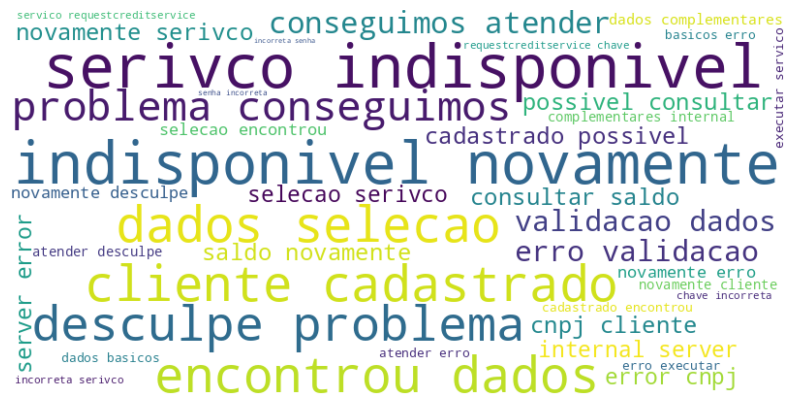

In [ ]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords=STOP_WORDS, width=800, height=400, background_color='white').generate(texto_completo)

# Exibir a nuvem de palavras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter

# Divida o texto em palavras
palavras = texto_completo.split()

# Conte a frequência de cada palavra
contagem_palavras = Counter(palavras)

# Ordene as palavras pela frequência (do mais comum para o menos comum)
palavras_ordenadas = contagem_palavras.most_common()

# Imprima as palavras e suas contagens
for palavra, contagem in palavras_ordenadas:
    print(f'{palavra}: {contagem}', 'vezes')

novamente: 270 vezes
dados: 262 vezes
serivco: 198 vezes
indisponivel: 198 vezes
erro: 180 vezes
encontrou: 138 vezes
selecao: 138 vezes
cliente: 136 vezes
cadastrado: 136 vezes
desculpe: 131 vezes
problema: 131 vezes
conseguimos: 131 vezes
atender: 131 vezes
validacao: 124 vezes
incorreta: 77 vezes
cnpj: 73 vezes
possivel: 72 vezes
consultar: 72 vezes
saldo: 72 vezes
internal: 68 vezes
server: 68 vezes
error: 68 vezes
complementares: 64 vezes
basicos: 60 vezes
executar: 56 vezes
servico: 56 vezes
requestcreditservice: 56 vezes
chave: 52 vezes
senha: 25 vezes


 9 – Montar nuvem de palavras sobre as mensagens de erro para os tipos de avaliação dos clientes. (colunas: erro e avaliacao).

In [ ]:
#WORDCLOUD AVALIAÇÕES POSITIVAS
avaliacao_positiva = dados_atendimentos[dados_atendimentos['avaliacao'] ==  'positiva']
avaliacao_positiva

texto_positivo= " ".join(s for s in avaliacao_positiva['erro_ajustado'])
texto_positivo

'serivco indisponivel novamente possivel consultar saldo novamente serivco indisponivel novamente possivel consultar saldo novamente encontrou dados selecao desculpe problema conseguimos atender possivel consultar saldo novamente cliente cadastrado encontrou dados selecao desculpe problema conseguimos atender erro executar servico requestcreditservice internal server error possivel consultar saldo novamente encontrou dados selecao serivco indisponivel novamente desculpe problema conseguimos atender erro executar servico requestcreditservice internal server error serivco indisponivel novamente serivco indisponivel novamente erro validacao dados complementares possivel consultar saldo novamente cliente cadastrado erro validacao dados basicos chave incorreta erro validacao dados complementares internal server error erro executar servico requestcreditservice chave incorreta possivel consultar saldo novamente cliente cadastrado serivco indisponivel novamente desculpe problema conseguimos at

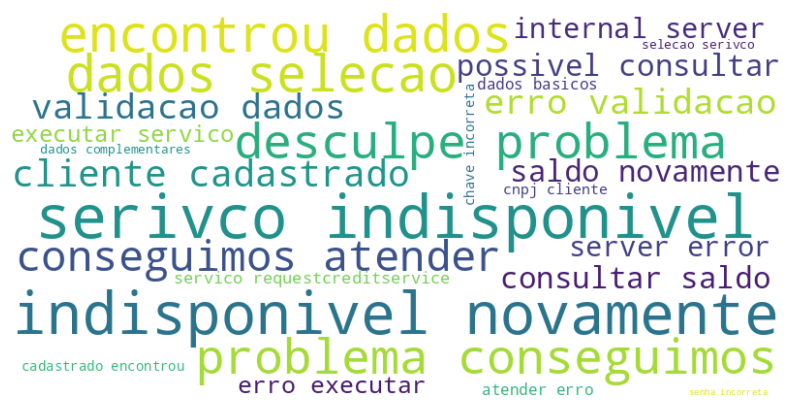

In [ ]:
wordcloud = WordCloud(stopwords=STOP_WORDS, width=800, height=400, background_color='white').generate(texto_positivo)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#WORDCLOUD AVALIAÇÕES NEGATIVAS
avaliacao_negativa = dados_atendimentos[dados_atendimentos['avaliacao'] ==  'negativa']
avaliacao_negativa

texto_negativo = " ".join(s for s in avaliacao_negativa['erro_ajustado'])
texto_negativo

'erro validacao dados complementares internal server error cnpj cliente cadastrado serivco indisponivel novamente cliente cadastrado encontrou dados selecao serivco indisponivel novamente chave incorreta erro validacao dados complementares internal server error serivco indisponivel novamente cliente cadastrado encontrou dados selecao serivco indisponivel novamente erro validacao dados basicos chave incorreta erro validacao dados complementares internal server error serivco indisponivel novamente erro validacao dados basicos chave incorreta serivco indisponivel novamente cnpj cliente cadastrado serivco indisponivel novamente encontrou dados selecao desculpe problema conseguimos atender erro validacao dados basicos chave incorreta serivco indisponivel novamente erro validacao dados complementares cnpj cliente cadastrado possivel consultar saldo novamente cliente cadastrado encontrou dados selecao encontrou dados selecao desculpe problema conseguimos atender chave incorreta serivco indisp

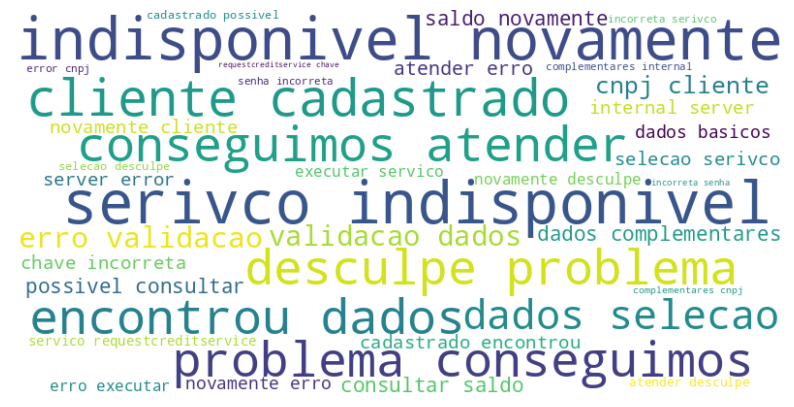

In [ ]:
wordcloud = WordCloud(stopwords=STOP_WORDS, width=800, height=400, background_color='white').generate(texto_negativo)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#WORDCLOUD AVALIAÇÕES NÃO AVALIADAS
avaliacao_na = dados_atendimentos[dados_atendimentos['avaliacao'] ==  'n/ avaliado']
avaliacao_na

texto_na = " ".join(s for s in avaliacao_na['erro_ajustado'])
texto_na

'encontrou dados selecao desculpe problema conseguimos atender desculpe problema conseguimos atender erro validacao dados basicos erro executar servico requestcreditservice cnpj cliente cadastrado desculpe problema conseguimos atender erro executar servico requestcreditservice serivco indisponivel novamente cnpj cliente cadastrado serivco indisponivel novamente encontrou dados selecao desculpe problema conseguimos atender erro validacao dados complementares cliente cadastrado desculpe problema conseguimos atender erro validacao dados basicos erro executar servico requestcreditservice internal server error encontrou dados selecao encontrou dados selecao desculpe problema conseguimos atender encontrou dados selecao serivco indisponivel novamente internal server error encontrou dados selecao chave incorreta internal server error cnpj cliente cadastrado serivco indisponivel novamente encontrou dados selecao encontrou dados selecao chave incorreta erro validacao dados complementares interna

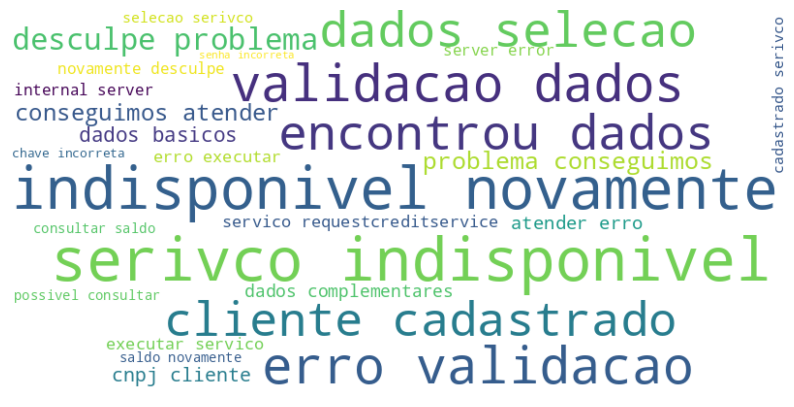

In [ ]:
wordcloud = WordCloud(stopwords=STOP_WORDS, width=800, height=400, background_color='white').generate(texto_na)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

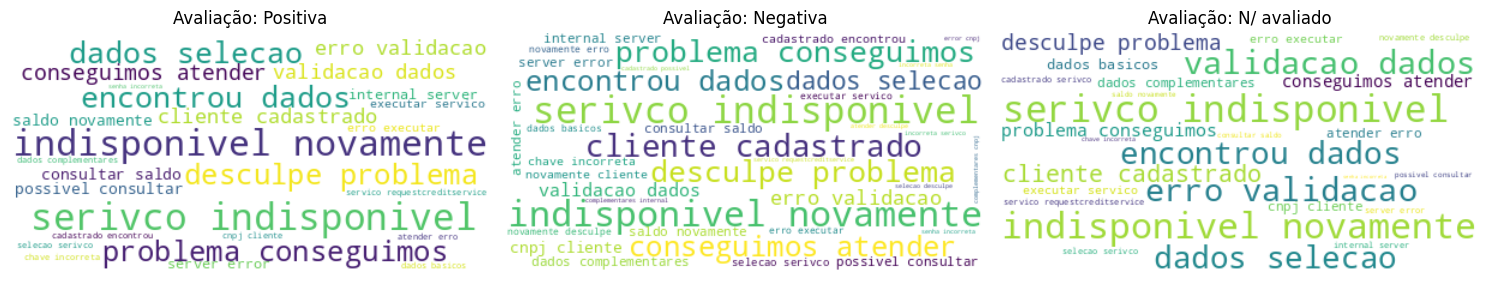

In [ ]:
# Forma de visualização os 3 lado a lado, onde o tamanho das palavras corresponde as que mais aparecem

def plot_wordcloud(ax, dados_atendimentos, avaliacao):
    dados_avaliacao = dados_atendimentos[dados_atendimentos['avaliacao'] == avaliacao]
    texto = " ".join(s for s in dados_avaliacao['erro_ajustado'])

    wordcloud = WordCloud(stopwords=STOP_WORDS, width=400, height=200, background_color='white', relative_scaling=0.5).generate(texto)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Avaliação: {avaliacao.capitalize()}')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

avaliacoes = ['positiva', 'negativa', 'n/ avaliado']
for i, avaliacao in enumerate(avaliacoes):
    plot_wordcloud(axs[i], dados_atendimentos, avaliacao)

plt.tight_layout()
plt.show()

In [ ]:
# CONTAGEM DE PALAVRAS MAIS FREQUENTES EM ERROS QUE GERAM AVALIAÇÕES POSITIVAS
palavras_p = texto_positivo.split()
contagem_palavras_p = Counter(palavras_p)
palavras_ordenadas_p = contagem_palavras_p.most_common()

for palavra, contagem in palavras_ordenadas_p:
    print(f'{palavra}: {contagem}', 'vezes')

novamente: 72 vezes
dados: 61 vezes
serivco: 46 vezes
indisponivel: 46 vezes
erro: 44 vezes
encontrou: 34 vezes
selecao: 34 vezes
desculpe: 32 vezes
problema: 32 vezes
conseguimos: 32 vezes
atender: 32 vezes
cliente: 28 vezes
cadastrado: 28 vezes
validacao: 27 vezes
possivel: 26 vezes
consultar: 26 vezes
saldo: 26 vezes
internal: 23 vezes
server: 23 vezes
error: 23 vezes
incorreta: 18 vezes
executar: 17 vezes
servico: 17 vezes
requestcreditservice: 17 vezes
basicos: 15 vezes
cnpj: 14 vezes
chave: 13 vezes
complementares: 12 vezes
senha: 5 vezes


In [ ]:
# CONTAGEM DE PALAVRAS MAIS FREQUENTES EM ERROS QUE GERAM AVALIAÇÕES NEGATIVAS
palavras_n = texto_negativo.split()
contagem_palavras_n = Counter(palavras_n)
palavras_ordenadas_n = contagem_palavras_n.most_common()

for palavra, contagem in palavras_ordenadas_n:
    print(f'{palavra}: {contagem}', 'vezes')

novamente: 138 vezes
dados: 128 vezes
serivco: 103 vezes
indisponivel: 103 vezes
erro: 83 vezes
cliente: 75 vezes
cadastrado: 75 vezes
desculpe: 70 vezes
problema: 70 vezes
conseguimos: 70 vezes
atender: 70 vezes
encontrou: 69 vezes
selecao: 69 vezes
validacao: 59 vezes
incorreta: 44 vezes
cnpj: 41 vezes
complementares: 35 vezes
possivel: 35 vezes
consultar: 35 vezes
saldo: 35 vezes
internal: 31 vezes
server: 31 vezes
error: 31 vezes
chave: 30 vezes
basicos: 24 vezes
executar: 24 vezes
servico: 24 vezes
requestcreditservice: 24 vezes
senha: 14 vezes


In [ ]:
# CONTAGEM DE PALAVRAS MAIS FREQUENTES EM ERROS QUE GERAM ATENDIMENTOS NÃO AVALIADOS
palavras_na = texto_na.split()
contagem_palavras_na = Counter(palavras_na)
palavras_ordenadas_na = contagem_palavras_na.most_common()

for palavra, contagem in palavras_ordenadas_na:
    print(f'{palavra}: {contagem}', 'vezes')

dados: 73 vezes
novamente: 60 vezes
erro: 53 vezes
serivco: 49 vezes
indisponivel: 49 vezes
validacao: 38 vezes
encontrou: 35 vezes
selecao: 35 vezes
cliente: 33 vezes
cadastrado: 33 vezes
desculpe: 29 vezes
problema: 29 vezes
conseguimos: 29 vezes
atender: 29 vezes
basicos: 21 vezes
cnpj: 18 vezes
complementares: 17 vezes
executar: 15 vezes
servico: 15 vezes
requestcreditservice: 15 vezes
incorreta: 15 vezes
internal: 14 vezes
server: 14 vezes
error: 14 vezes
possivel: 11 vezes
consultar: 11 vezes
saldo: 11 vezes
chave: 9 vezes
senha: 6 vezes


10 – Na tabela do censo de 2010, obter o índice de Gini por UF (state) (criar um dataframe como df_gini_estado).

In [ ]:
df_gini_estado = dados_renda.groupby('state')['RDPC'].apply(gini).reset_index(name='Indice de Gini')

print(df_gini_estado)

# DF é Indice de Gini 0 nesse caso, pois só possui uma cidade e a renda está agrupada por cidade no dataset

   state  Indice de Gini
0     AC        0.195495
1     AL        0.140823
2     AM        0.180262
3     AP        0.177035
4     BA        0.160275
5     CE        0.132551
6     DF        0.000000
7     ES        0.153020
8     GO        0.138104
9     MA        0.187907
10    MG        0.192143
11    MS        0.134532
12    MT        0.154616
13    PA        0.208619
14    PB        0.134084
15    PE        0.169153
16    PI        0.149203
17    PR        0.131235
18    RJ        0.146672
19    RN        0.144012
20    RO        0.127922
21    RR        0.241690
22    RS        0.153786
23    SC        0.137464
24    SE        0.140378
25    SP        0.140590
26    TO        0.173719


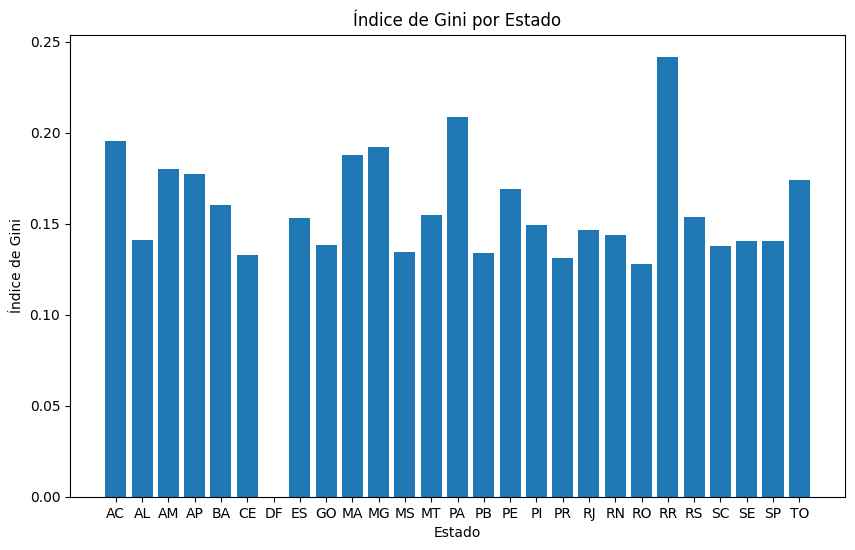

In [ ]:
# Plotar gráfico de barras eixo x = estados e eixo y = indice de gini

plt.figure(figsize=(10, 6))
plt.bar(df_gini_estado['state'], df_gini_estado['Indice de Gini'])
plt.title('Índice de Gini por Estado')
plt.xlabel('Estado')
plt.ylabel('Índice de Gini')
plt.show()

11 – Realizar o join das tabelas de atendimento e df_gini_estado.

In [ ]:
# Join das tabelas de atendimento e df_gini_estado
dados_atendimentos_com_gini = pd.merge(dados_atendimentos, df_gini_estado, on='state', how='left')

In [ ]:
dados_atendimentos_com_gini

,idEntrada,state,usuarioOnline,statusSaida,paginaSaida,avaliacao,dataHoraEntrada,dataHoraSaida,dataHoraErro,tempoAcesso,codigo,erro,erro_ajustado,Indice de Gini
0,1,CE,1,80%,1,positiva,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,173,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",serivco indisponivel novamente,0.132551
1,2,PE,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,212,550,"""ERRO NA VALIDACAO DE DADOS COMPLEMENTARES""",erro validacao dados complementares,0.169153
2,3,CE,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 18:04,18/05/2021 18:03,427,500,"""INTERNAL SERVER ERROR""",internal server error,0.132551
3,4,PR,0,20%,4,negativa,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,248,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",cnpj cliente cadastrado,0.131235
4,5,TO,0,20%,4,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:02,256,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",possivel consultar saldo novamente,0.173719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,CE,0,40%,3,positiva,18/05/2021 17:57,18/05/2021 18:01,18/05/2021 18:00,229,550,"""CPF -CNPJ CLIENTE NAO CADASTRADO""",cnpj cliente cadastrado,0.132551
996,997,AP,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:03,18/05/2021 18:02,368,500,"""OPS! NÃO FOI POSSIVEL CONSULTAR O SALDO. TENT...",possivel consultar saldo novamente,0.177035
997,998,AM,0,60%,2,negativa,18/05/2021 17:57,18/05/2021 17:58,18/05/2021 17:57,78,550,"""NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. PO...",serivco indisponivel novamente,0.180262
998,999,ES,0,40%,3,negativa,18/05/2021 17:57,18/05/2021 18:00,18/05/2021 17:59,177,500,"""CLIENTE NAO CADASTRADO""",cliente cadastrado,0.153020


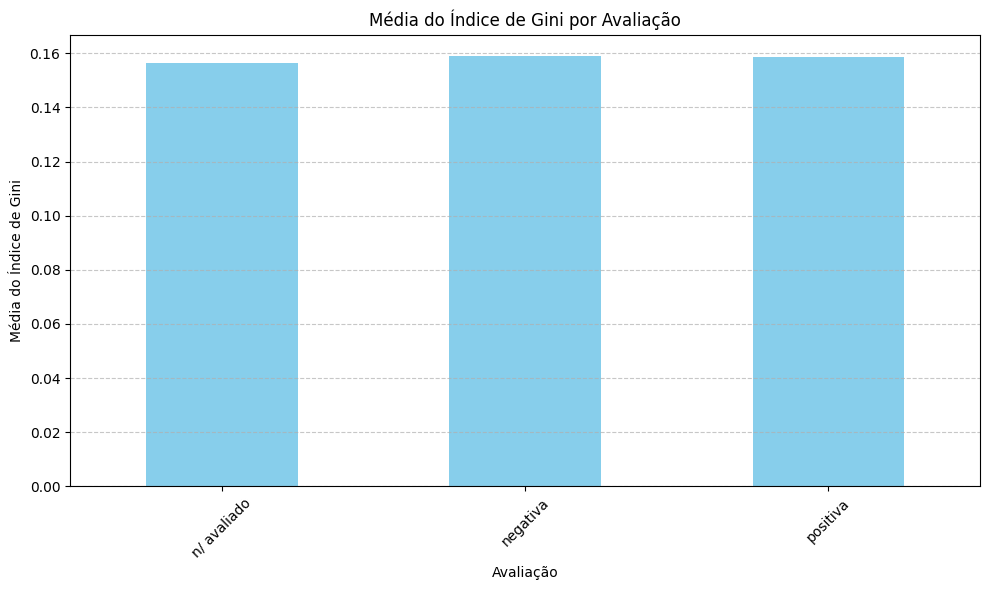

In [ ]:
# Agrupar os dados por avaliação e calcular a média do índice de Gini
media_gini_por_avaliacao = dados_atendimentos_com_gini.groupby('avaliacao')['Indice de Gini'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
media_gini_por_avaliacao.plot(kind='bar', color='skyblue')
plt.title('Média do Índice de Gini por Avaliação')
plt.xlabel('Avaliação')
plt.ylabel('Média do Índice de Gini')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

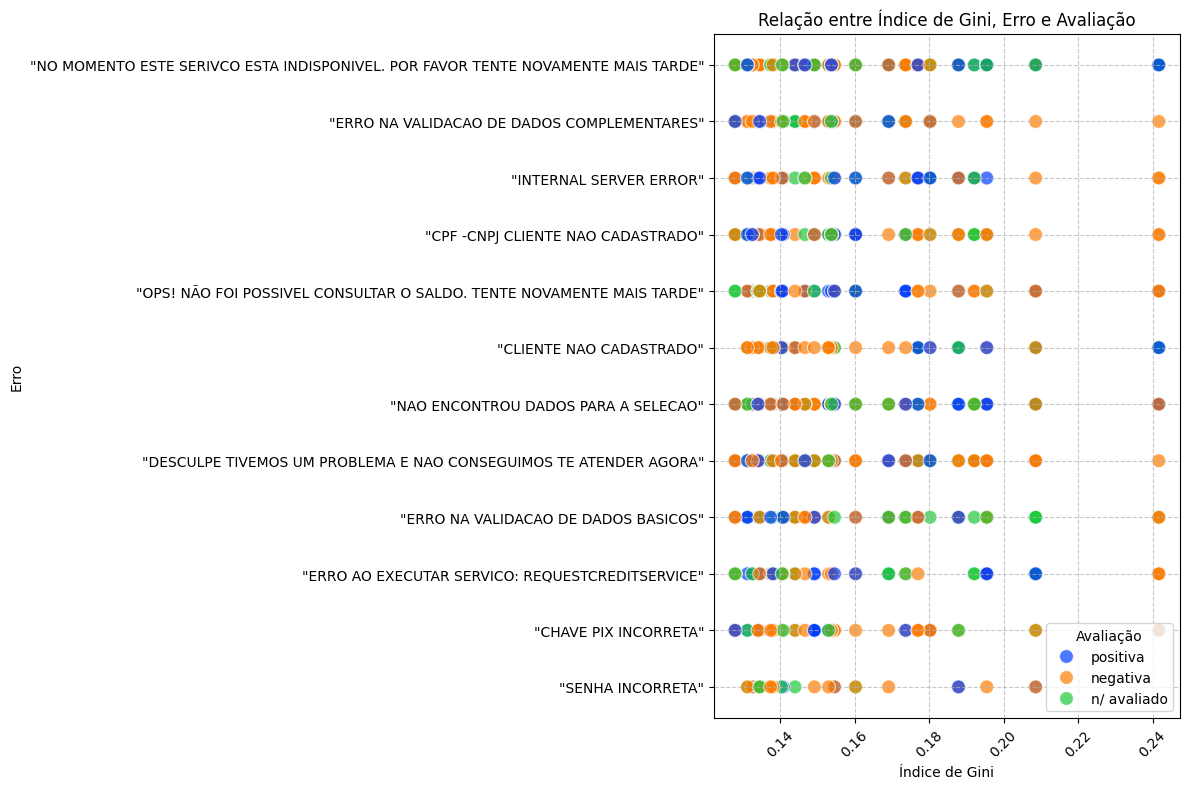

In [ ]:
# Criar o gráfico de dispersão agrupado
plt.figure(figsize=(12, 8))
sns.scatterplot(data=dados_atendimentos_com_gini, x='Indice de Gini', y='erro', hue='avaliacao', palette='bright', alpha=0.7, s=100)
plt.title('Relação entre Índice de Gini, Erro e Avaliação')
plt.xlabel('Índice de Gini')
plt.ylabel('Erro')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Avaliação')
plt.tight_layout()
plt.show()

12 – Obter as medidas descritivas em relação ao índice de gini por tipo de avaliação (colunas: indice_gini e avaliacao). Esta análise é importante para conhecer se o banco realiza melhor atendimento em estados de maior diferença social. Pode ser um problema para a imagem do banco.

In [ ]:
# Agrupar os dados por tipo de avaliação (avaliacao) e calcular as estatísticas descritivas para o índice de Gini
descritivas_por_avaliacao = dados_atendimentos_com_gini.groupby('avaliacao')['Indice de Gini'].describe()

# Renomear as colunas do DataFrame

descritivas_por_avaliacao.rename(columns={
    'count': 'Contagem',
    'mean': 'Tempo médio',
    'std': 'Desvio padrão',
    'min': 'Tempo mínimo',
    '25%': 'Primeiro quartil',
    '50%': 'Mediana do tempo',
    '75%': 'Terceiro quartil',
    'max': 'Tempo máximo'
}, inplace=True)



descritivas_por_avaliacao

,Contagem,Tempo médio,Desvio padrão,Tempo mínimo,Primeiro quartil,Mediana do tempo,Terceiro quartil,Tempo máximo
avaliacao,,,,,,,,
n/ avaliado,239.0,0.156475,0.024968,0.127922,0.138104,0.149203,0.173719,0.24169
negativa,510.0,0.158849,0.027977,0.127922,0.138104,0.149203,0.177035,0.24169
positiva,251.0,0.158473,0.027496,0.127922,0.138104,0.149203,0.173719,0.24169


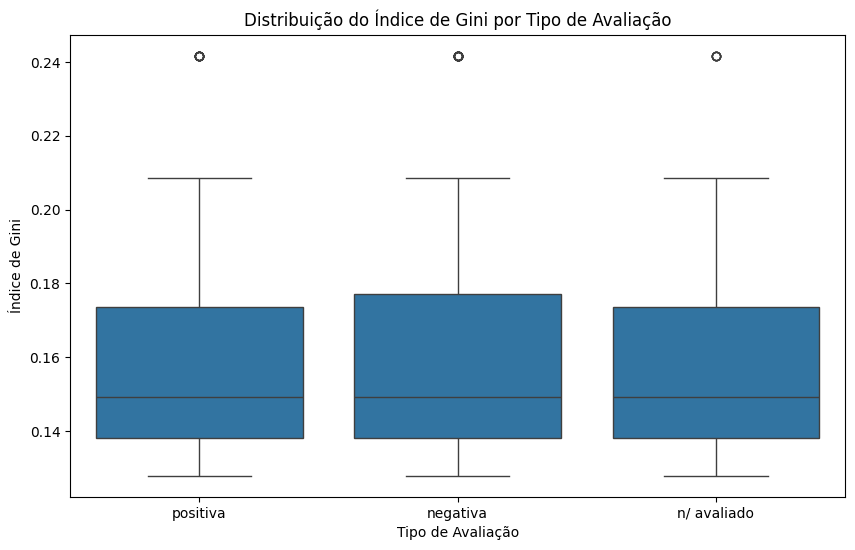

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotar boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='avaliacao', y='Indice de Gini', data=dados_atendimentos_com_gini)
plt.title('Distribuição do Índice de Gini por Tipo de Avaliação')
plt.xlabel('Tipo de Avaliação')
plt.ylabel('Índice de Gini')
plt.show()

13 – Escreva um breve resumo das suas análises demonstrando os pontos mais relevantes.

1-3
A grande maioria dos atendimentos ocorrem offline, praticamente para cada 1 atendimento online temos 3 offline. Isso pode significar que essas pessoas buscaram atendimento quando estavam sem acesso, para resolver o problema.

Existem 3 tipos de avaliação de atendimento: Positiva, negativa e não avaliado. As avaliações negativas ocorreram em maior quantidade do que as avaliações positivas e não avaliadas somada juntas. Isso significa que mais de 50% das vezes o atendimento não é satisfatório.

Também analisamos que os 3 erros mais comuns que geram abertura de chamado são: "NO MOMENTO ESTE SERIVCO ESTA INDISPONIVEL. POR FAVOR TENTE NOVAMENTE MAIS TARDE", "NAO ENCONTROU DADOS PARA A SELECAO" e "DESCULPE TIVEMOS UM PROBLEMA E NAO CONSEGUIMOS TE ATENDER AGORA".

4-7
Concluimos que o tempo médio e o tempo máximo de acesso de quem iniciou atendimento offline ou online são muito parecidos.

Também chegamos a conclusão que as médias de tempo de atendimento entre quem não avaliou o atendimento, quem ficou insatisfeito e quem ficou satisfeito, são muito parecidas. Mesmo que os indivíduos com maiores tempos de atendimento, não tenham avaliado o atendimento.

As médias de tempo de atendimento por tipo de erro que gerou o atendimento, mostram que no geral o erro não influencia no tempo de atendimento.

8/9
Em todos os tipos de avaliações, algumas palavras são consistentemente comuns, como "dados", "serviço", "indisponível" e "erro". Isso sugere que esses problemas são frequentemente encontrados pelos clientes, independentemente do resultado da avaliação.

Palavras como "desculpe", "problema", "não conseguimos atender" são mais frequentes em erros que resultam em avaliações negativas.

Termos como "internal server error" e "executar serviço" são mais comuns em erros que resultam em avaliações negativas e não avaliadas. Isso sugere que problemas técnicos e falhas de execução de serviços podem ter um impacto negativo na experiência do cliente.

10-12
Fazendo uma análise de correlação entre o índice de Gini e as métricas de qualidade de atendimento nos exercícios anteriores, ao contrário do esperado, não foi suficiente para relacionar desigualdade de renda e qualidade do atendimento, pois os valores foram muito semelhantes.

Para fazer uma análise mais detalhada, precisaríamos:

Definir Métricas Específicas de Qualidade de Atendimento, pode incluir tempo médio de resposta, taxa de resolução de problemas, graus de satisfação do cliente com base em pesquisas pós-atendimento.

A última conclusão foi que provavelmente os resultados dos índices de gini estarem longe da realidade (como por exemplo o Distrito Federal não existir desigualde social por só possuir uma cidade), não importavam muito no checkpoint e foi inutil encontrar um outro dataset real também de 2010, tratar os dados e fazer as análises e chegar em números muito parecidos, porque na verdade o fato de estarmos pegando a média de renda per capita da população das cidades afeta pois para o indice de gini precisariamos da média de renda per capita  POR FAMÍLIA para ter um número mais perto da realidade da desigualdade social entre as famílias brasileiras.


Mas mesmo assim tá aí o dataset encontrado e os Indices de Gini calculados:



TESTE DE DATASET PEGO NO IPEADATA


Link para download do csv: https://drive.google.com/file/d/1luDI5siDuQIukcSmrpmGPqZbsz5vrc0_/view?usp=sharing

In [ ]:
dados_renda_atlasDH = pd.read_csv('dados_renda_municipios_2010_atlasDH.csv', error_bad_lines=False, sep = ';', decimal = ",", encoding='latin-1')

<ipython-input-49-d5535cd8c407>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dados_renda_atlasDH = pd.read_csv('dados_renda_municipios_2010_atlasDH.csv', error_bad_lines=False, sep = ';', decimal = ",", encoding='latin-1')


In [ ]:
dados_renda_atlasDH['RDPC'].fillna(0, inplace=True)
dados_renda_atlasDH

,state,cod,city,RDPC,Unnamed: 4
0,AC,1200013,Acrelândia,303.76,NaN
1,AC,1200054,Assis Brasil,291.33,NaN
2,AC,1200104,Brasiléia,376.07,NaN
3,AC,1200138,Bujari,340.95,NaN
4,AC,1200179,Capixaba,336.17,NaN
...,...,...,...,...,...
5591,TO,1721208,Tocantinópolis,414.08,NaN
5592,TO,1721257,Tupirama,401.76,NaN
5593,TO,1721307,Tupiratins,337.79,NaN
5594,TO,1722081,Wanderlândia,376.35,NaN


In [ ]:
dados_renda_atlasDH.drop('Unnamed: 4', axis=1, inplace=True)

In [ ]:
dados_renda_atlasDH

,state,cod,city,RDPC
0,AC,1200013,Acrelândia,303.76
1,AC,1200054,Assis Brasil,291.33
2,AC,1200104,Brasiléia,376.07
3,AC,1200138,Bujari,340.95
4,AC,1200179,Capixaba,336.17
...,...,...,...,...
5591,TO,1721208,Tocantinópolis,414.08
5592,TO,1721257,Tupirama,401.76
5593,TO,1721307,Tupiratins,337.79
5594,TO,1722081,Wanderlândia,376.35


In [ ]:
df_gini_estado_2 = dados_renda_atlasDH.groupby('state')['RDPC'].apply(gini).reset_index(name='Indice de Gini')

print(df_gini_estado_2)

# dados muito parecidos com o dataset fornecido pelo professor, portanto sem relevância.

   state  Indice de Gini
0     AC        0.195495
1     AL        0.140823
2     AM        0.180262
3     AP        0.177035
4     BA        0.168254
5     CE        0.151007
6     DF        0.000000
7     ES        0.174194
8     GO        0.138104
9     MA        0.187907
10    MG        0.192143
11    MS        0.145487
12    MT        0.160569
13    PA        0.224881
14    PB        0.134084
15    PE        0.182411
16    PI        0.153393
17    PR        0.139858
18    RJ        0.164828
19    RN        0.144012
20    RO        0.127922
21    RR        0.241690
22    RS        0.158873
23    SC        0.146206
24    SE        0.140378
25    SP        0.141920
26    TO        0.173719


Legal 🤡